In [1]:
# utilities needed for data pre-processing
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# utilities needed for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# utilities needed for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# read the dataset
df = pd.read_csv("./airbnb_data.csv", index_col=0)

In [3]:
# get information about the csv file
display("No. of rows in dataset:",len(df))
display("No. of columns in dataset:",len(df.columns))
df.info()

'No. of rows in dataset:'

56727

'No. of columns in dataset:'

14

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56727 entries, 1 to 56727
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              56727 non-null  int64  
 1   name                            56288 non-null  object 
 2   host_id                         56727 non-null  int64  
 3   host_name                       56706 non-null  object 
 4   neighbourhood_group             56297 non-null  object 
 5   neighbourhood                   56727 non-null  object 
 6   latitude                        56727 non-null  float64
 7   longitude                       56727 non-null  float64
 8   room_type                       56344 non-null  object 
 9   price                           56279 non-null  float64
 10  minimum_nights                  56727 non-null  int64  
 11  calculated_host_listings_count  56727 non-null  int64  
 12  availability_365                

In [4]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,Target
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,6,365.0,0
2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,2,355.0,0
3,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,1,365.0,0
4,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,1,194.0,1
5,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56723,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,2,9.0,0
56724,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,2,36.0,0
56725,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,1,27.0,0
56726,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,6,2.0,0


In [5]:
# column Name has multiple NaN values
# name is not important for our model, so dropping the column from the dataframe
df.drop(columns=['name'], inplace=True)
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,Target
1,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,6,365.0,0
2,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,2,355.0,0
3,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,1,365.0,0
4,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,1,194.0,1
5,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,1,0.0,0


In [6]:
# mapping each neighbourhood to its neighbourhood_group
groups = df[df['neighbourhood_group'].notna()].groupby('neighbourhood')
neighbourhood_map = pd.Series([], dtype='str')
for i,j in groups:
    if len(j['neighbourhood_group'].value_counts()) > 1: # checking if one neighbourhood belongs to multiple groups (checking for corrupt data)
        print(i)
        display(j['neighbourhood_group'].value_counts())
    else:
        neighbourhood_map[i] = j['neighbourhood_group'].value_counts().index.values[0] # creating a map for neighbourhood and neighbourhood_group

In [7]:
neighbourhood_map

Allerton                   Bronx
Arden Heights      Staten Island
Arrochar           Staten Island
Arverne                   Queens
Astoria                   Queens
                       ...      
Windsor Terrace         Brooklyn
Woodhaven                 Queens
Woodlawn                   Bronx
Woodrow            Staten Island
Woodside                  Queens
Length: 221, dtype: object

In [8]:
# checking if there is any neighbourhood which has no look up from the map we created
df['neighbourhood'].map(lambda nb: neighbourhood_map[nb]).isna().sum()

0

In [9]:
# replacing the NaN values with our mapped values
df['neighbourhood_group'] = df['neighbourhood'].map(lambda nb: neighbourhood_map[nb])
df[df['neighbourhood_group'].isna()] # checking if there are any null entries left

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,Target


In [10]:
# mapping price to its neighbourhood
groups = df[df['price'].notna()].groupby('neighbourhood')
neighbourhood_pricemap = pd.Series([], dtype='float64')
for i,j in groups:
    neighbourhood_pricemap[i] = j['price'].mean() # getting the mean of each neighbourhood

In [11]:
neighbourhood_pricemap

Allerton            87.595238
Arden Heights       67.250000
Arrochar           119.100000
Arverne            171.779221
Astoria            117.187919
                      ...    
Windsor Terrace    137.267974
Woodhaven           67.170455
Woodlawn            60.090909
Woodrow            700.000000
Woodside            85.670996
Length: 219, dtype: float64

In [12]:
# removing the rows that have just 1 neighbourhood with NaN price - we have no lookup for those
display(len(df)) # see the entire dataframe 
df = df[df['neighbourhood'].map(lambda nb: nb in neighbourhood_pricemap.index.values)]
display(len(df)) # to see how many rows are dropped 

56727

56725

In [13]:
# checking the NaN values in price column
df.apply(lambda row: neighbourhood_pricemap[row['neighbourhood']] if np.isnan(row['price']) else row['price'], axis=1)

1        149.0
2        225.0
3        150.0
4         89.0
5         80.0
         ...  
56723     70.0
56724     40.0
56725    115.0
56726     55.0
56727     90.0
Length: 56725, dtype: float64

In [14]:
# replacing NaN price columns with the mean price of the particular neighbourhood it belongs to
# if price already exists, keep as is. Otherwise, replace NaN with the mean from our map
df['price'] = df.apply(lambda row: neighbourhood_pricemap[row['neighbourhood']] if np.isnan(row['price']) else row['price'], axis=1)

In [15]:
# checking if all the price columns are appropriately filled
df['price'].isna().sum()

0

In [16]:
# dropping rows of availability_365 and room_type that have NaN values
# there is no way of grouping or predicting the possible values of these rows
df = df.dropna(subset=['availability_365','room_type'])

In [17]:
# finally, dropping duplicates left after all the previous cleaning
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True) # we do not want random indexes 

In [18]:
# the final dataframe we will use for analysis
df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,Target
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,6,365.0,0
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,2,355.0,0
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,1,365.0,0
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,1,194.0,1
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48063,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,2,9.0,0
48064,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,2,36.0,0
48065,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,1,27.0,0
48066,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,6,2.0,0


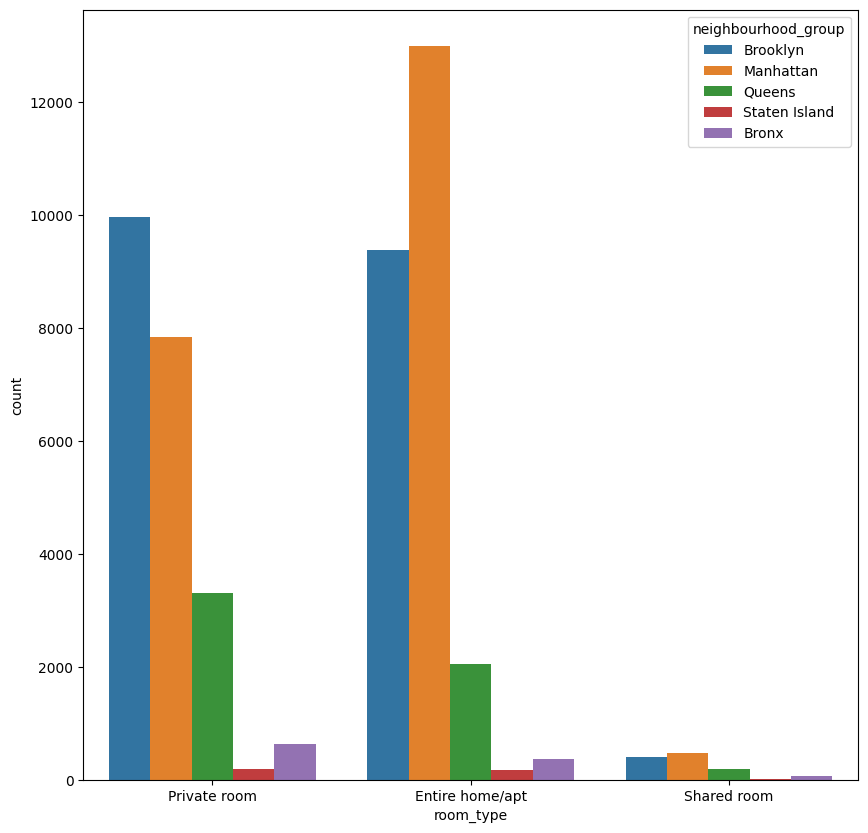

In [19]:
# visualize mean price of listing in each neighbourhood

# using the sns library because hist() was not giving a proper grouped histogram
plt.figure(figsize=(10,10))
sns.countplot(x='room_type', hue='neighbourhood_group', data=df)
plt.show()

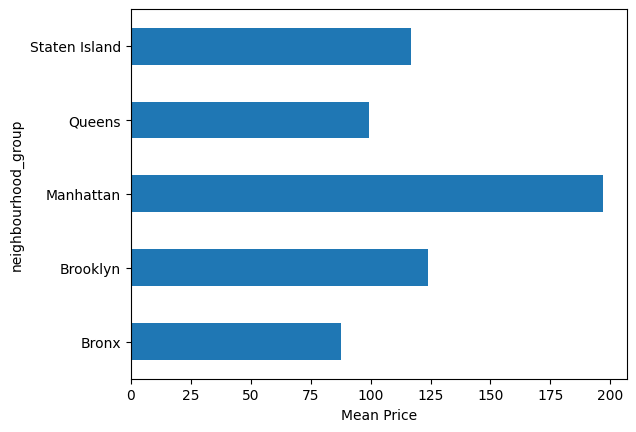

In [20]:
# visualizing mean price of listing in each neighbourhood_group

df.groupby('neighbourhood_group')['price'].mean().plot(kind='barh')
plt.xlabel('Mean Price')
plt.show()

In [21]:
# Modeling with Logistic Regression

# transforming the categorical variables into dummy variables
encode = preprocessing.LabelEncoder()
encode.fit(df.neighbourhood)
df.neighbourhood=encode.transform(df.neighbourhood)

encode = preprocessing.LabelEncoder()
encode.fit(df.neighbourhood_group)
df.neighbourhood_group=encode.transform(df.neighbourhood_group)

encode = preprocessing.LabelEncoder()
encode.fit(df.room_type)
df.room_type=encode.transform(df.room_type)

df.sort_values(by='price', ascending=True, inplace=True)

In [22]:
# fitting the model
l_reg = LogisticRegression()

# the predictors we are going to use for our model
X = df[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','calculated_host_listings_count','availability_365']]
y = df['Target']

# splitting the dataset into train and test data in a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=597)

l_reg.fit(X_train,y_train)

LogisticRegression()

In [23]:
# storing the predictions
y_pred = l_reg.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [24]:
# checking our testing data
y_test

9748     0
23936    1
9374     1
41916    0
14397    1
        ..
4907     1
44619    0
30483    0
28095    0
22481    1
Name: Target, Length: 9614, dtype: int64

In [25]:
y_test.value_counts()

0    5249
1    4365
Name: Target, dtype: int64

In [26]:
# confusion matrix to evaluate the accuracy of the classification
confmatrix = confusion_matrix(y_test,y_pred)
confmatrix

array([[4389,  860],
       [2219, 2146]], dtype=int64)

In [27]:
# getting the accuracy score of our model
accuracy_score(y_test,y_pred)

0.6797378822550447

In [28]:
# this is the minimum accuracy of the worst case model - the model has much better accuracy
1 - y_test.mean()

0.5459746203453297